Import Essential Libraries

In [506]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

Import Dataset

In [ ]:
df = pd.read_csv('./data/customers.csv', sep='\t', index_col='ID_')
df.drop(columns=['Dt_Customer'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   int

View Missing Values

In [508]:
df.isna().mean() * 100

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Drop Missing Values

In [509]:
df.dropna(inplace=True)
df.isna().mean() * 100

Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

Display Categorical Columns

In [510]:
cat_cols = df.select_dtypes( include=[ "object" ] ).columns
cat_cols

Index(['Education', 'Marital_Status'], dtype='object')

Encode Categorical Columns Using One-Hot Encoding

In [511]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)
df

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
ID_                                                                           
5524         1957  58138.0        0         0       58       635         88   
2174         1954  46344.0        1         1       38        11          1   
4141         1965  71613.0        0         0       26       426         49   
6182         1984  26646.0        1         0       26        11          4   
5324         1981  58293.0        1         0       94       173         43   
...           ...      ...      ...       ...      ...       ...        ...   
10870        1967  61223.0        0         1       46       709         43   
4001         1946  64014.0        2         1       56       406          0   
7270         1981  56981.0        0         0       91       908         48   
8235         1956  69245.0        0         1        8       428         30   
9405         1954  52869.0        1         1       40        84          3   

       MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
ID_                                                        ...   
5524               546              172                88  ...   
2174                 6                2                 1  ...   
4141               127              111                21  ...   
6182                20               10                 3  ...   
5324               118               46                27  ...   
...                ...              ...               ...  ...   
10870              182               42               118  ...   
4001                30                0                 0  ...   
7270               217               32                12  ...   
8235               214               80                30  ...   
9405                61                2                 1  ...   

       Education_Graduation  Education_Master  Education_PhD  \
ID_                                                            
5524                      1                 0              0   
2174                      1                 0              0   
4141                      1                 0              0   
6182                      1                 0              0   
5324                      0                 0              1   
...                     ...               ...            ...   
10870                     1                 0              0   
4001                      0                 0              1   
7270                      1                 0              0   
8235                      0                 1              0   
9405                      0                 0              1   

       Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
ID_                                                                            
5524                      0                        0                       0   
2174                      0                        0                       0   
4141                      0                        0                       0   
6182                      0                        0                       0   
5324                      0                        0                       1   
...                     ...                      ...                     ...   
10870                     0                        0                       1   
4001                      0                        0                       0   
7270                      0                        1                       0   
8235                      0                        0                       0   
9405                      0                        0                       1   

       Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
ID_                                                                           
5524                       1                        0                     0   
2174     

Use Z-Score Outlier Deteciton To Remove Outliers

In [512]:
def zscore_outlier(df, threshold=3):
    numeric_cols = df.select_dtypes(include='number').columns
    z_scores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()
    mask = np.abs(z_scores).max(axis=1) < threshold

    return df[np.abs(z_scores).max(axis=1) < threshold], mask

df, mask = zscore_outlier(df, 3)
df

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
ID_                                                                          
5524        1957  58138.0        0         0       58       635         88   
2174        1954  46344.0        1         1       38        11          1   
4141        1965  71613.0        0         0       26       426         49   
6182        1984  26646.0        1         0       26        11          4   
5324        1981  58293.0        1         0       94       173         43   
...          ...      ...      ...       ...      ...       ...        ...   
9817        1970  44802.0        0         0       71       853         10   
8080        1986  26816.0        0         0       50         5          1   
8372        1974  34421.0        1         0       81         3          3   
8235        1956  69245.0        0         1        8       428         30   
9405        1954  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
ID_                                                       ...   
5524              546              172                88  ...   
2174                6                2                 1  ...   
4141              127              111                21  ...   
6182               20               10                 3  ...   
5324              118               46                27  ...   
...               ...              ...               ...  ...   
9817              143               13                10  ...   
8080                6                3                 4  ...   
8372                7                6                 2  ...   
8235              214               80                30  ...   
9405               61                2                 1  ...   

      Education_Graduation  Education_Master  Education_PhD  \
ID_                                                           
5524                     1                 0              0   
2174                     1                 0              0   
4141                     1                 0              0   
6182                     1                 0              0   
5324                     0                 0              1   
...                    ...               ...            ...   
9817                     0                 1              0   
8080                     1                 0              0   
8372                     1                 0              0   
8235                     0                 1              0   
9405                     0                 0              1   

      Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
ID_                                                                           
5524                     0                        0                       0   
2174                     0                        0                       0   
4141                     0                        0                       0   
6182                     0                        0                       0   
5324                     0                        0                       1   
...                    ...                      ...                     ...   
9817                     0                        0                       0   
8080                     0                        0                       0   
8372                     0                        0                       1   
8235                     0                        0                       0   
9405                     0                        0                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
ID_                                                                          
5524                      1                        0                     0   
2174                      1                        0           

Combine columns to create new features

In [513]:
df['MntPurchases'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

df['NumPurchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df.drop(columns=['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases'], inplace=True)

/var/folders/vs/d51q801d4010g687wh_k3dm00000gn/T/ipykernel_24006/1446989892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MntPurchases'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
/var/folders/vs/d51q801d4010g687wh_k3dm00000gn/T/ipykernel_24006/1446989892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)
/var/folders/vs/d51q801d4010g687wh

Drop Columns Not Contributing (Comment Out to view full Covariance Matrix)

In [514]:
df.drop(columns=[
                #  'Kidhome', 'Teenhome',                         # Comment for cleaner UMAP (Worse results)
                #  'Recency', 'Response', 'NumWebVisitsMonth',    # Comment for cleaner UMAP (Worse results)
                 'Education_Graduation', 'Education_Master', 'Education_PhD', 
                 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 
                 'Year_Birth', 'NumDealsPurchases'
                 ], inplace=True)

/var/folders/vs/d51q801d4010g687wh_k3dm00000gn/T/ipykernel_24006/85217174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[


Standardize The Dataset (Drop Columns with Zero Variance)

In [515]:
num_cols = df.select_dtypes(include=["number"]).columns
df_std = df[num_cols].std()

drop_mask = df_std[(df_std == 0)].index
df = df.drop(columns=drop_mask)

num_cols = df.select_dtypes(include=["number"]).columns
df_mean = df[num_cols].mean()
df_std = df[num_cols].std()

df[num_cols] = df[num_cols] - df_mean
df[num_cols] = df[num_cols] / df_std[num_cols]
df

Income   Kidhome  Teenhome   Recency  NumWebVisitsMonth  Response  \
ID_                                                                         
5524  0.611308 -0.959821 -1.011039  0.290945           0.669527  3.456594   
2174 -0.043188  0.843812  0.825744 -0.398602          -0.264270 -0.289106   
4141  1.359090 -0.959821 -1.011039 -0.812330          -0.731169 -0.289106   
6182 -1.136308  0.843812 -1.011039 -0.812330           0.202628 -0.289106   
5324  0.619910  0.843812 -1.011039  1.532128          -0.264270 -0.289106   
...        ...       ...       ...       ...                ...       ...   
9817 -0.128760 -0.959821 -1.011039  0.739150           1.136426 -0.289106   
8080 -1.126874 -0.959821 -1.011039  0.015126          -0.731169 -0.289106   
8372 -0.704843  0.843812 -1.011039  1.083923           0.669527 -0.289106   
8235  1.227680 -0.959821  0.825744 -1.432921          -1.198068 -0.289106   
9405  0.318910  0.843812  0.825744 -0.329647           0.669527  3.456594   

      MntPurchases  NumPurchases  
ID_                               
5524      2.544892      1.636544  
2174     -0.844978     -1.041602  
4141      0.751885      1.338972  
6182     -0.789547     -0.744030  
5324     -0.002841      0.446257  
...            ...           ...  
9817      1.333919      2.082901  
8080     -0.855638     -1.190388  
8372     -0.838582     -1.190388  
8235      0.894729      1.487758  
9405     -0.535839     -0.446458  

[1477 rows x 8 columns]

Plot Covariance Matrix For Remaining Columns

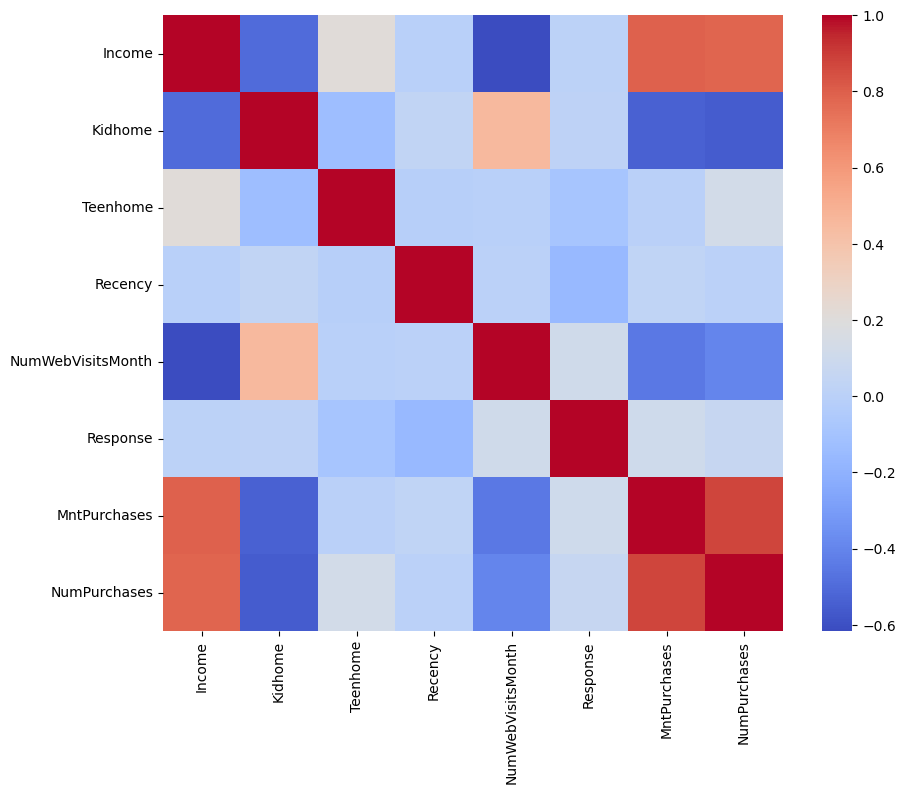

In [516]:
corr_matrix = df.corr()
labels = df.columns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, xticklabels=labels, yticklabels=labels, cmap="coolwarm")

plt.show()

Use UMAP as Dimention Reduction

/Users/amir/anaconda3/envs/py312ml/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


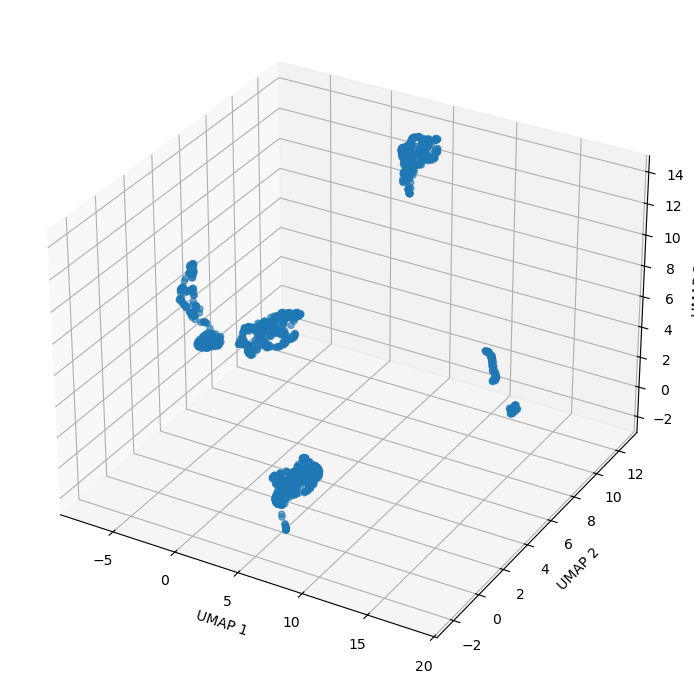

In [517]:
umap_model = umap.UMAP(n_components=3)
u = umap_model.fit_transform(df)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:, 0], u[:, 1], u[:, 2], alpha=0.6)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
plt.tight_layout()
plt.show()


Writing kmeans function and testing the algorithm

In [518]:
def plot_clusters(data_values, clusters, centroids, reducer):
    combined = np.vstack((data_values, centroids))
    embedded = reducer.transform(combined)

    data_embedded = embedded[:len(data_values)]
    centroids_embedded = embedded[len(data_values):]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple']

    for i in range(len(data_values)):
        ax.scatter(data_embedded[i, 0], data_embedded[i, 1], data_embedded[i, 2],
                   color=colors[clusters[i] % len(colors)], alpha=0.6)

    for i, centroid in enumerate(centroids_embedded):
        ax.scatter(centroid[0], centroid[1], centroid[2],
                color=colors[i % len(colors)], marker='X', s=200,
                edgecolor='black', label=f'Centroid {i}')

    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_zlabel("UMAP 3")
    ax.legend()
    plt.tight_layout()
    plt.show()

def kmeans_plus_plus_init(data_values, k):
    n_samples = data_values.shape[0]
    centroids = []

    # Step 1: Choose the first centroid randomly
    first_idx = np.random.randint(n_samples)
    centroids.append(data_values[first_idx])

    for _ in range(1, k):
        distances = np.array([min(np.sum((x - c) ** 2) for c in centroids) for x in data_values])

        # Step 3: Select next centroid with probability proportional to squared distance
        probabilities = distances / distances.sum()
        next_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(data_values[next_idx])

    return np.array(centroids)

def kmeans(data, reducer, k=4, max_iters=10, plot=True):
    # Selecting Initial Centroids (Using Kmeans++)
    data_values = data.to_numpy()
    centroids = kmeans_plus_plus_init(data_values, k)
    clusters = np.zeros(len(data_values), dtype=int)

    for iteration in range(max_iters):
        # Calculate Distances
        for i, point in enumerate(data_values):
            distances = [np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids]
            clusters[i] = np.argmin(distances)
        
        # Update Centroids
        new_centroids = []
        for j in range(k):
            cluster_points = data_values[clusters == j]
            new_centroids.append(cluster_points.mean(axis=0))

        new_centroids = np.array(new_centroids)

        # Plot Clusters
        if plot:
            plot_clusters(data_values, clusters, new_centroids, reducer)

        # Convergence check
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

kmeans_clusters, _ = kmeans(df, reducer=umap_model, k=4, plot=False)

Compute Distortion, Cohesion, and Separation for Plotting

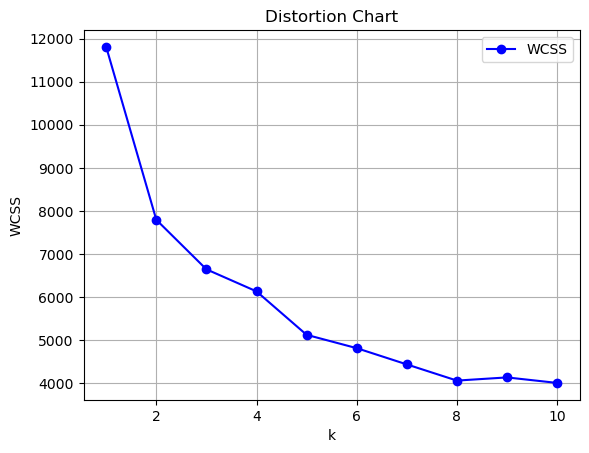

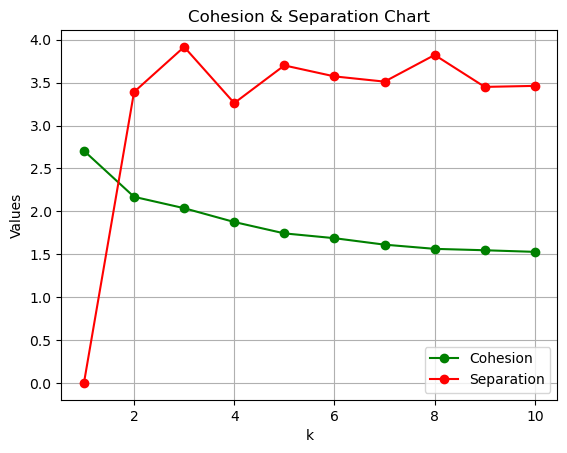

In [519]:
def compute_metrics(data, reducer, max_k=10):
    data_values = data.to_numpy()
    wcss_list = []
    cohesion_list = []
    separation_list = []

    for k in range(1, max_k + 1):
        clusters, centroids = kmeans(data, reducer=reducer, k=k, max_iters=20, plot=False)
        
        # Distortion & Cohesion
        wcss = 0
        cohesion = 0
        for i, point in enumerate(data_values):
            centroid = centroids[clusters[i]]
            dist = np.sum((point - centroid) ** 2)
            wcss += dist
            cohesion += np.sqrt(dist)

        cohesion /= len(data_values)

        # Separation
        if k > 1:
            sep_sum = 0
            count = 0
            for i in range(k):
                for j in range(i+1, k):
                    sep_sum += np.linalg.norm(centroids[i] - centroids[j])
                    count += 1
            separation = sep_sum / count
        else:
            separation = 0

        wcss_list.append(wcss)
        cohesion_list.append(cohesion)
        separation_list.append(separation)

    return wcss_list, cohesion_list, separation_list


wcss, cohesion, separation = compute_metrics(df, reducer=umap_model, max_k=10)

plt.plot(range(1, 11), wcss, 'bo-', label='WCSS')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Distortion Chart")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(range(1, 11), cohesion, 'go-', label='Cohesion')
plt.plot(range(1, 11), separation, 'ro-', label='Separation')
plt.xlabel("k")
plt.ylabel("Values")
plt.title("Cohesion & Separation Chart")
plt.legend()
plt.grid(True)
plt.show()


Plot Clusters

Silhouette Score: 0.3386


/Users/amir/anaconda3/envs/py312ml/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


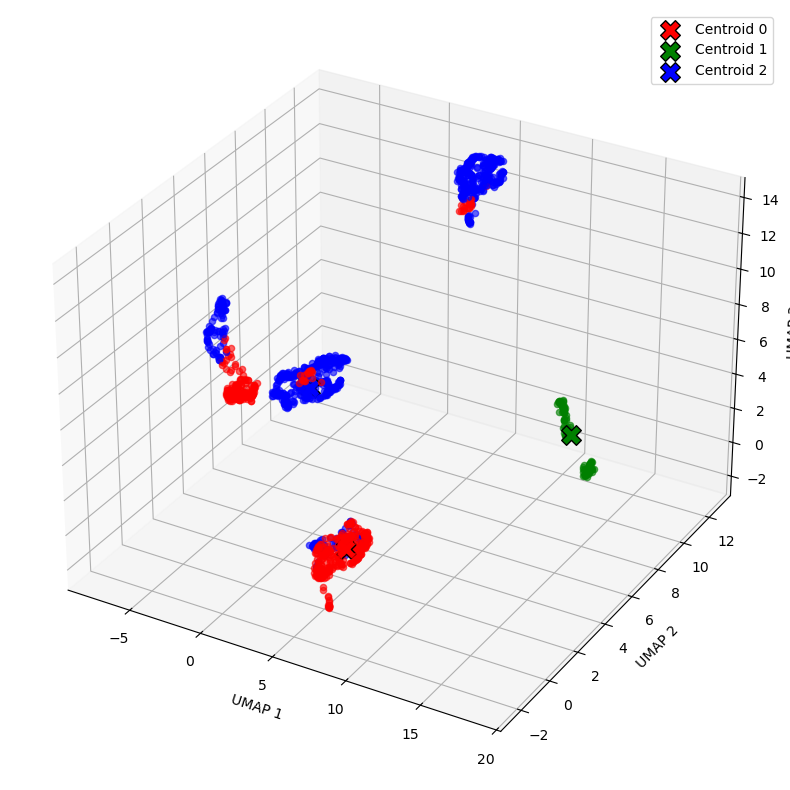

In [528]:
clusters, centroids = kmeans(df, reducer=umap_model, k=3, plot=False)
data_values = df.to_numpy()

score = silhouette_score(df, clusters)
print(f"Silhouette Score: {score:.4f}")

plot_clusters(data_values, clusters, centroids, umap_model)


Plot Similarity Matrix

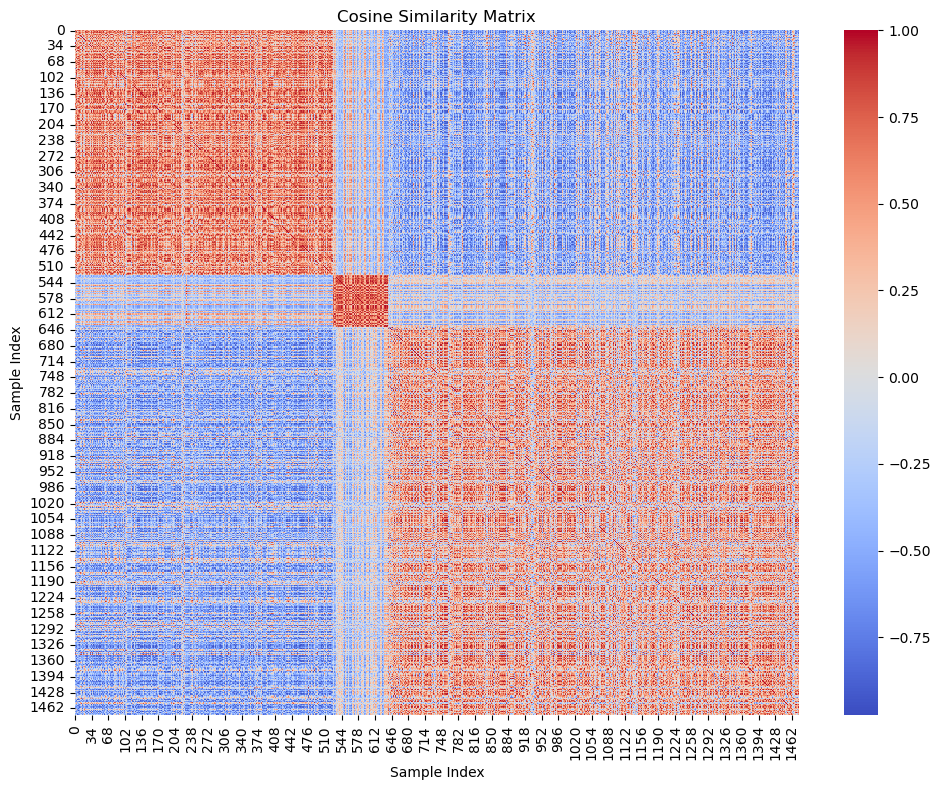

In [529]:
def plot_similarity_matrix(data_values, clusters, method='cosine'):
    sorted_indices = np.argsort(clusters)
    sorted_data = data_values[sorted_indices]

    if method == 'cosine':
        sim_matrix = cosine_similarity(sorted_data)
    elif method == 'euclidean':
        dists = euclidean_distances(sorted_data)
        sim_matrix = np.exp(-dists)

    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_matrix, cmap='coolwarm')
    plt.title(f'{method.capitalize()} Similarity Matrix')
    plt.xlabel("Sample Index")
    plt.ylabel("Sample Index")
    plt.tight_layout()
    plt.show()

data_values = df.to_numpy()
plot_similarity_matrix(data_values, clusters, method='cosine')

Compute Distortion, Cohesion, and Separation for Plotting (Comparing with sklearn)

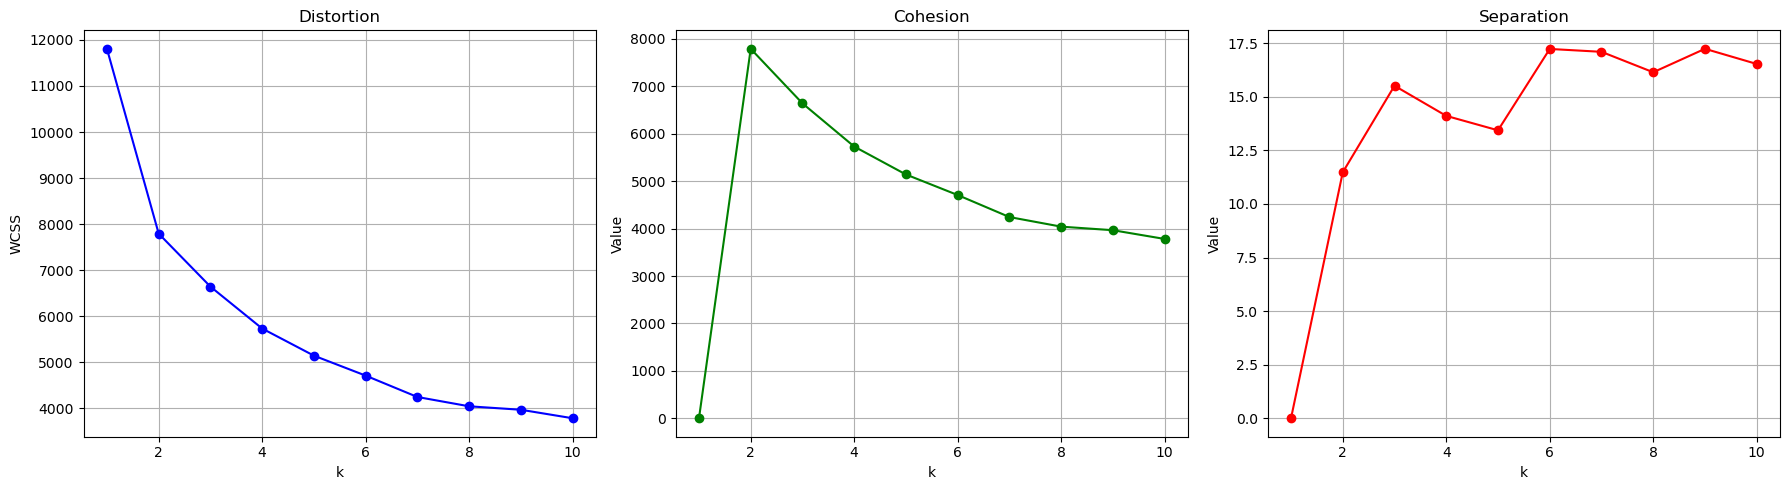

In [522]:
def compute_metrics_sklearn(X, k_range=range(1, 11)):
    wcss = []
    cohesion = []
    separation = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
        labels = kmeans.fit_predict(X)
        centers = kmeans.cluster_centers_

        wcss.append(kmeans.inertia_)

        if k > 1:
            dist_to_center = np.linalg.norm(X - centers[labels], axis=1)
            cohesion.append(np.sum(dist_to_center ** 2))

            dists = []
            for i in range(k):
                for j in range(i + 1, k):
                    dists.append(np.linalg.norm(centers[i] - centers[j]) ** 2)
            separation.append(np.mean(dists))
        else:
            cohesion.append(0)
            separation.append(0)

    return wcss, cohesion, separation

wcss, cohesion, separation = compute_metrics_sklearn(df)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(range(1, 11), wcss, marker='o', color='blue')
axs[0].set_title("Distortion")
axs[0].set_xlabel("k")
axs[0].set_ylabel("WCSS")
axs[0].grid(True)

axs[1].plot(range(1, 11), cohesion, marker='o', color='green')
axs[1].set_title("Cohesion")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Value")
axs[1].grid(True)

axs[2].plot(range(1, 11), separation, marker='o', color='red')
axs[2].set_title("Separation")
axs[2].set_xlabel("k")
axs[2].set_ylabel("Value")
axs[2].grid(True)

plt.tight_layout()
plt.show()

Testing sklearn Algorithm (Kmeans)

Silhouette Score: 0.3373


/Users/amir/anaconda3/envs/py312ml/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


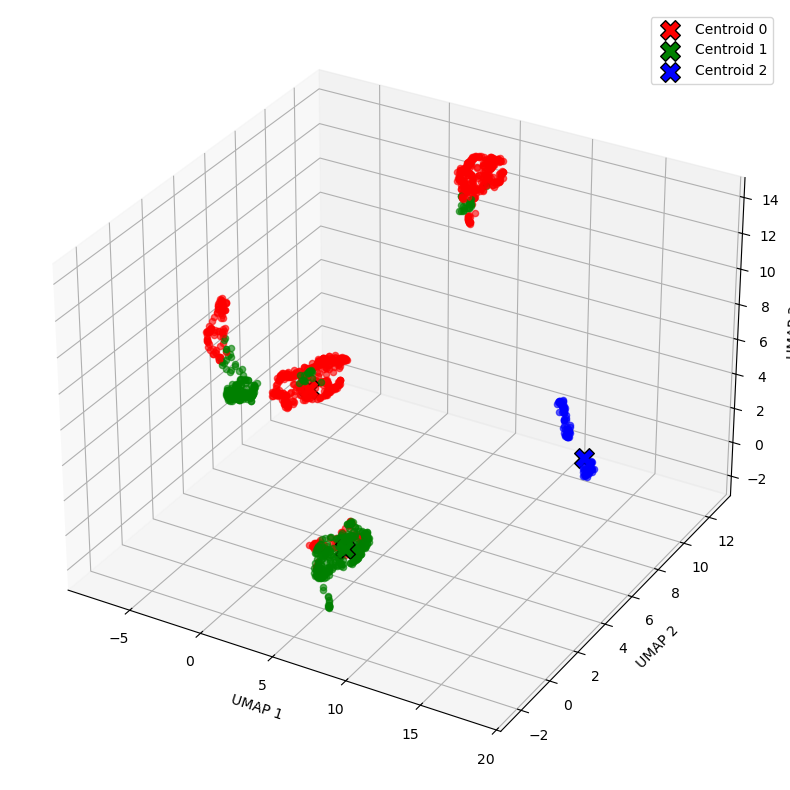

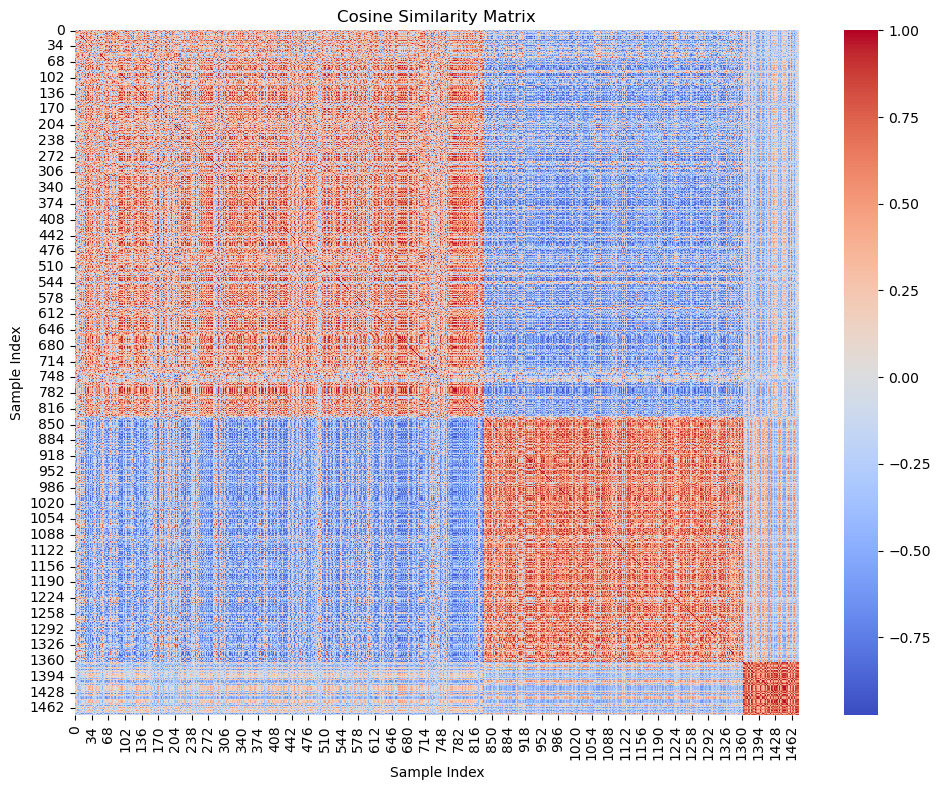

In [523]:
model = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = model.fit_predict(df)
centers = model.cluster_centers_

score = silhouette_score(df, labels)
print(f"Silhouette Score: {score:.4f}")

plot_clusters(data_values, labels, centers, umap_model)
plot_similarity_matrix(data_values, labels, method='cosine')

Determining Eps for DBSCAN

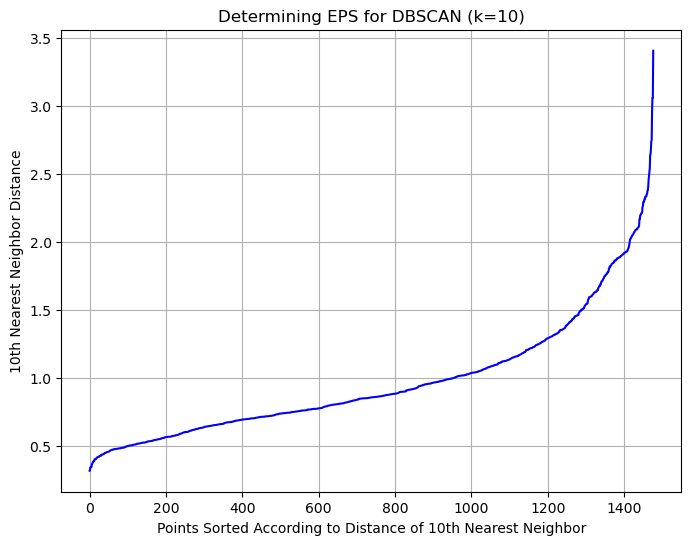

In [524]:
k = 10

neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df)
distances, _ = neigh.kneighbors(df)

kth_distances = distances[:, k-1]
kth_distances = np.sort(kth_distances)

plt.figure(figsize=(8, 6))
plt.plot(range(len(kth_distances)), kth_distances, color='blue')
plt.xlabel(f"Points Sorted According to Distance of {k}th Nearest Neighbor")
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.title(f"Determining EPS for DBSCAN (k={k})")
plt.grid(True)
plt.show()

Testing sklearn Algorithm (DBSCAN)

Silhouette Score: 0.2696


/Users/amir/anaconda3/envs/py312ml/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


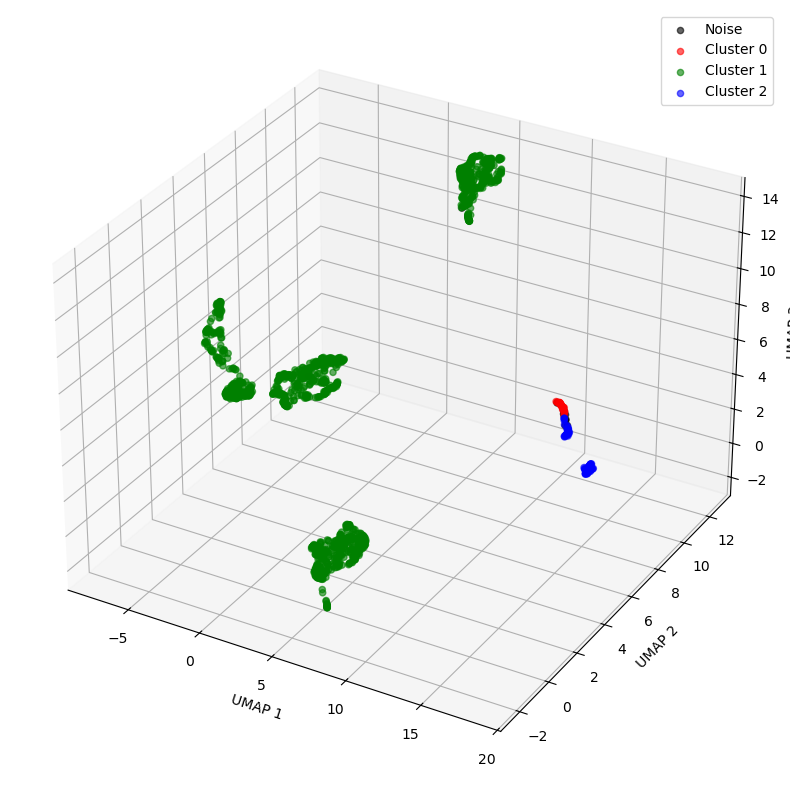

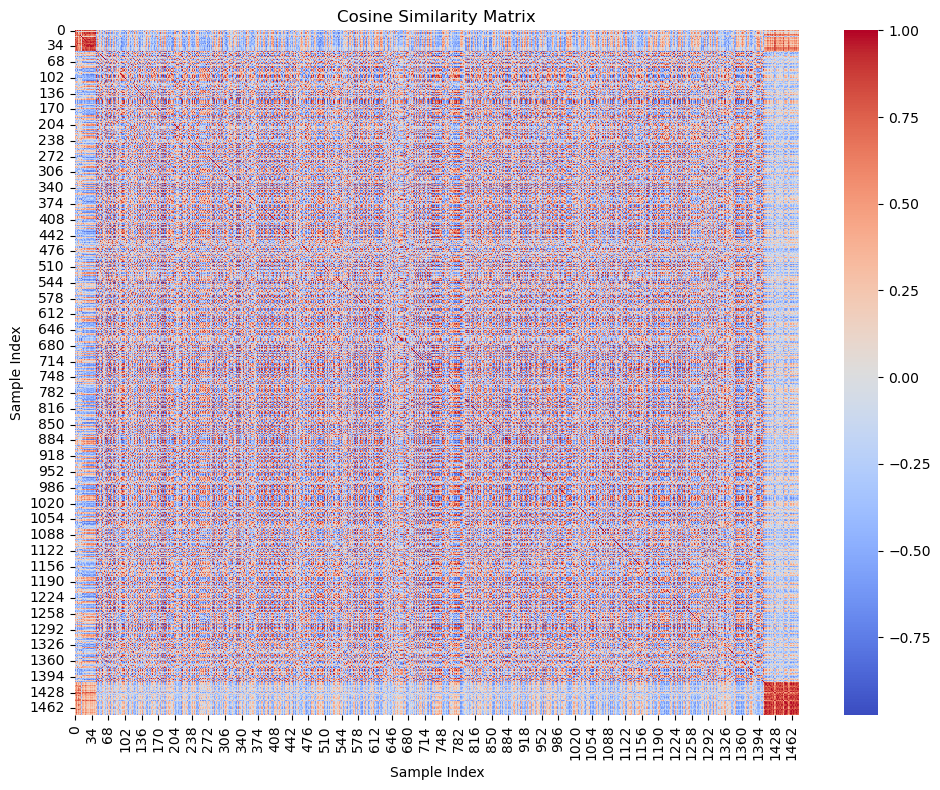

In [525]:
model = DBSCAN(eps=2, min_samples=k)
labels = model.fit_predict(df)

score = silhouette_score(df, labels)
print(f"Silhouette Score: {score:.4f}")

def plot_dbscan_clusters(data_values, clusters, reducer):
    embedded = reducer.transform(data_values)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'lime', 'brown']

    unique_clusters = sorted(set(clusters))
    for cluster_id in unique_clusters:
        cluster_mask = (clusters == cluster_id)
        label = f'Cluster {cluster_id}' if cluster_id != -1 else 'Noise'
        color = 'k' if cluster_id == -1 else colors[cluster_id % len(colors)]

        ax.scatter(
            embedded[cluster_mask, 0],
            embedded[cluster_mask, 1],
            embedded[cluster_mask, 2],
            color=color, label=label, alpha=0.6
        )

    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_zlabel("UMAP 3")
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_dbscan_clusters(data_values, labels, umap_model)
plot_similarity_matrix(data_values, labels, method='cosine')

Prepare Dataset for Evaluation

In [530]:
df = pd.read_csv('customers.csv', sep='\t', index_col='ID_')
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)
df = df[mask]
df['Cluster'] = clusters
df

Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
ID_                                                                           
5524        1957  58138.0        0         0  04-09-2012       58       635   
2174        1954  46344.0        1         1  08-03-2014       38        11   
4141        1965  71613.0        0         0  21-08-2013       26       426   
6182        1984  26646.0        1         0  10-02-2014       26        11   
5324        1981  58293.0        1         0  19-01-2014       94       173   
...          ...      ...      ...       ...         ...      ...       ...   
9817        1970  44802.0        0         0  21-08-2012       71       853   
8080        1986  26816.0        0         0  17-08-2012       50         5   
8372        1974  34421.0        1         0  01-07-2013       81         3   
8235        1956  69245.0        0         1  24-01-2014        8       428   
9405        1954  52869.0        1         1  15-10-2012       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  Education_Master  \
ID_                                                ...                     
5524         88              546              172  ...                 0   
2174          1                6                2  ...                 0   
4141         49              127              111  ...                 0   
6182          4               20               10  ...                 0   
5324         43              118               46  ...                 0   
...         ...              ...              ...  ...               ...   
9817         10              143               13  ...                 1   
8080          1                6                3  ...                 0   
8372          3                7                6  ...                 0   
8235         30              214               80  ...                 1   
9405          3               61                2  ...                 0   

      Education_PhD  Marital_Status_Alone  Marital_Status_Divorced  \
ID_                                                                  
5524              0                     0                        0   
2174              0                     0                        0   
4141              0                     0                        0   
6182              0                     0                        0   
5324              1                     0                        0   
...             ...                   ...                      ...   
9817              0                     0                        0   
8080              0                     0                        0   
8372              0                     0                        0   
8235              0                     0                        0   
9405              1                     0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
ID_                                                                            
5524                       0                      1                        0   
2174                       0                      1                        0   
4141                       0                      0                        1   
6182                       0                      0                        1   
5324                       1                      0                        0   
...                      ...                    ...                      ...   
9817                       0                      1                        0   
8080                       0                      1                        0   
8372                       1                      0                        0   
8235                       0                      0                        1   
9405                       1                      0                        0   

      Marital_Status_Widow  Marital_S

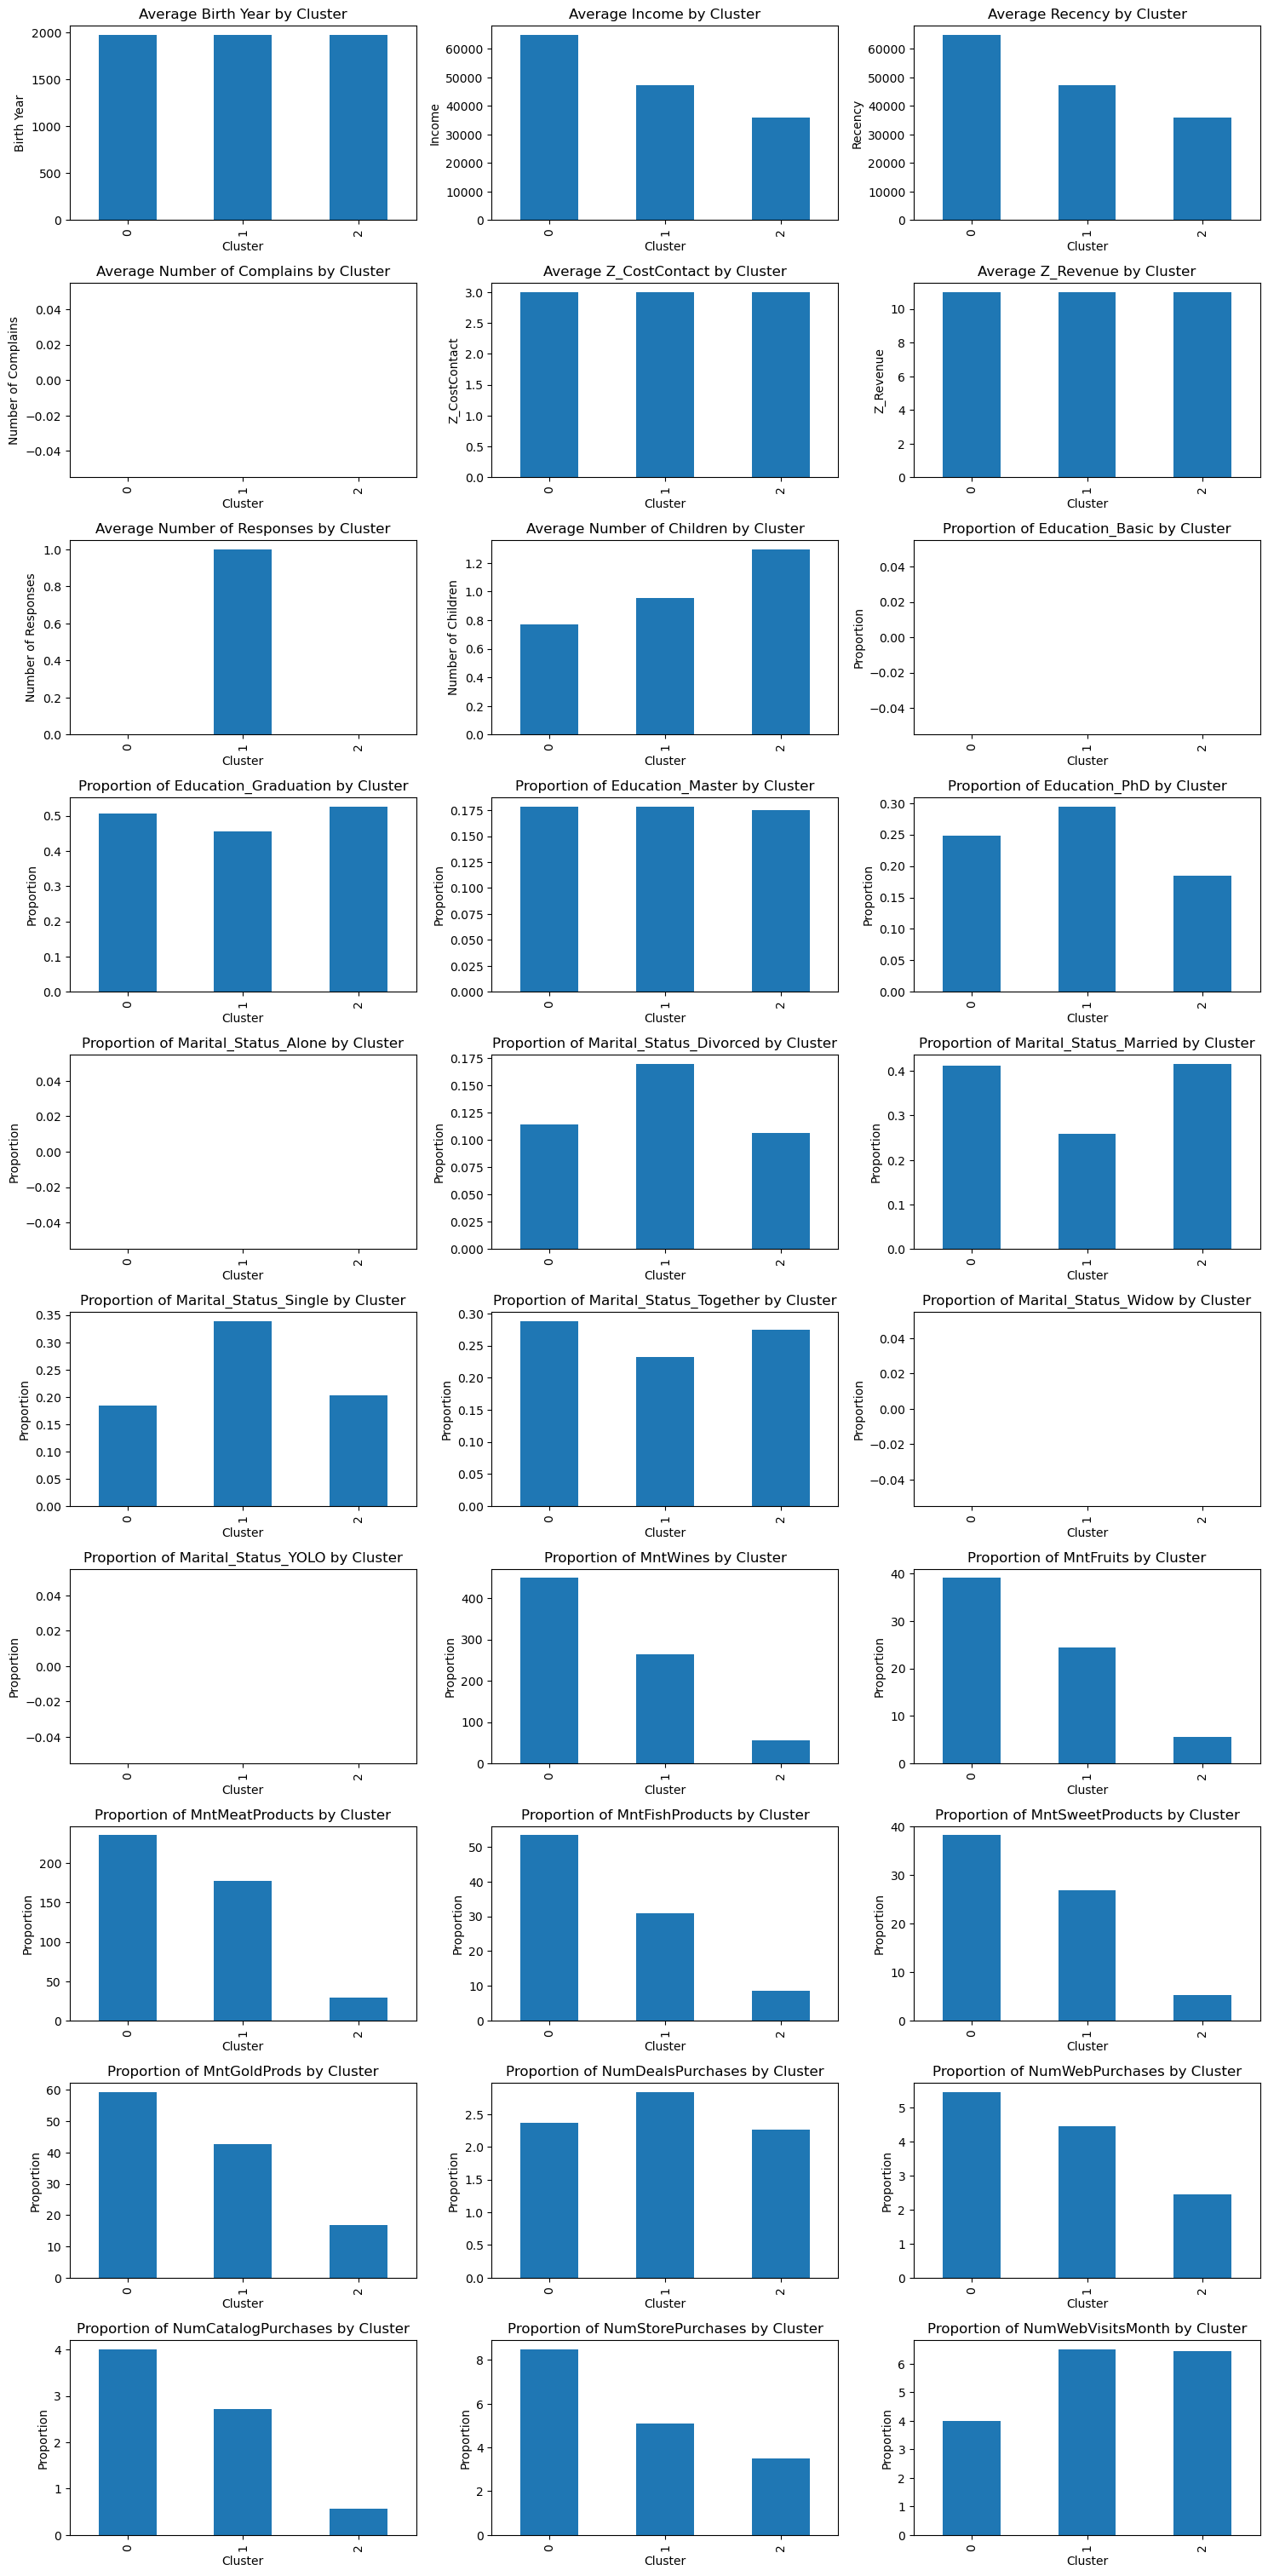

In [543]:
year_birth_by_cluster = df.groupby('Cluster')['Year_Birth'].mean()

income_by_cluster = df.groupby('Cluster')['Income'].mean()

recency_by_cluster = df.groupby('Cluster')['Recency'].mean()

complain_by_cluster = df.groupby('Cluster')['Complain'].mean()

z_cost_contract_by_cluster = df.groupby('Cluster')['Z_CostContact'].mean()

z_revenue_by_cluster = df.groupby('Cluster')['Z_Revenue'].mean()

response_by_cluster = df.groupby('Cluster')['Response'].mean()

df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
children_by_cluster = df.groupby('Cluster')['TotalChildren'].mean()

education_cols = [col for col in df.columns if col.startswith('Education_')]
education_by_cluster = {col: df.groupby('Cluster')[col].mean() for col in education_cols}

marital_cols = [col for col in df.columns if col.startswith('Marital_Status_')]
marital_by_cluster = {col: df.groupby('Cluster')[col].mean() for col in marital_cols}

mnt_cols = [col for col in df.columns if col.startswith('Mnt')]
mnt_by_cluster = {col: df.groupby('Cluster')[col].mean() for col in mnt_cols}

num_cols = [col for col in df.columns if col.startswith('Num')]
num_by_cluster = {col: df.groupby('Cluster')[col].mean() for col in num_cols}

plt.figure(figsize=(15, 36))

plt.subplot(12, 3, 1)
year_birth_by_cluster.plot(kind='bar')
plt.title('Average Birth Year by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Birth Year')

plt.subplot(12, 3, 2)
income_by_cluster.plot(kind='bar')
plt.title('Average Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

plt.subplot(12, 3, 3)
income_by_cluster.plot(kind='bar')
plt.title('Average Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

plt.subplot(12, 3, 4)
complain_by_cluster.plot(kind='bar')
plt.title('Average Number of Complains by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Complains')

plt.subplot(12, 3, 5)
z_cost_contract_by_cluster.plot(kind='bar')
plt.title('Average Z_CostContact by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Z_CostContact')

plt.subplot(12, 3, 6)
z_revenue_by_cluster.plot(kind='bar')
plt.title('Average Z_Revenue by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Z_Revenue')

plt.subplot(12, 3, 7)
response_by_cluster.plot(kind='bar')
plt.title('Average Number of Responses by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Responses')

plt.subplot(12, 3, 8)
children_by_cluster.plot(kind='bar')
plt.title('Average Number of Children by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Children')

for i, (col, data) in enumerate(education_by_cluster.items(), start=9):
    plt.subplot(12, 3, i)
    data.plot(kind='bar')
    plt.title(f'Proportion of {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')

for i, (col, data) in enumerate(marital_by_cluster.items(), start=13):
    plt.subplot(12, 3, i)
    data.plot(kind='bar')
    plt.title(f'Proportion of {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')

for i, (col, data) in enumerate(mnt_by_cluster.items(), start=20):
    plt.subplot(12, 3, i)
    data.plot(kind='bar')
    plt.title(f'Proportion of {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')

for i, (col, data) in enumerate(num_by_cluster.items(), start=26):
    plt.subplot(12, 3, i)
    data.plot(kind='bar')
    plt.title(f'Proportion of {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')

plt.tight_layout()
plt.show()
